<a href="https://colab.research.google.com/github/CsJ0oe/OpenAI-Gym-CartPole-v1-Qlearning/blob/master/CartPole_Qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment

In [0]:
class CartPoleEnv:

  def __init__(self):
    self.env = gym.make('CartPole-v1')

  def action_space(self):
    return 2

  def observation_space(self):
    return 162+1

  def reset(self):
    return self.box2int(self.env.reset())

  def step(self, action):
    next_state, reward, done, info = self.env.step(action)
    
    return self.box2int(next_state), reward, done, info

  def render(self):
    return self.env.render()

  def close(self):
    return self.env.close()
  
  def box2int(self,state_box):
    pos   = state_box[0]
    pos_v = state_box[1]
    ang   = state_box[2]
    ang_v = state_box[3]
    res   = 0
    if pos < -2.4 or pos > 2.4 or ang < -0.2094384 or ang > 0.2094384:
      return 162
    if   pos < -0.8 : res = 0
    elif pos < 0.8  : res = 1
    else		    	  : res = 2
    if   pos_v < -0.5 : pass
    elif pos_v < 0.5  : res += 3
    else 			        : res += 6
    if   ang < -0.1047192   : pass
    elif ang < -0.0174532   : res += 9
    elif ang < 0 		        : res += 18
    elif ang < 0.0174532  	: res += 27
    elif ang < 0.1047192    : res += 36
    else	    			        : res += 45
    if   ang_v < -0.87266       : pass
    elif ang_v < 0.87266        : res += 54
    else                        : res += 108
    return res

# Agent Q-learning

In [0]:
class agent_q_learning:
  def __init__(self, env):
    self.action_size      = env.action_space()      # Nombre d'action possible
    self.observation_size = env.observation_space() # Nombre d'états possibles
    self.q  = {(s,a) : 0 for s in range(self.observation_size) for a in range(self.action_size)} # Les q-valeurs
    self.epsilon = 1 # paramètre espilon
    self.alpha   = 1 # paramètre alpha
    self.gamma   = 1 # paramètre gamma

  def reset(self):
    self.alpha   = max(0.01,   self.alpha*0.995)
    self.epsilon = max(0.01, self.epsilon*0.995)
    return 
        
  def play(self, s):
    if (random.random() < self.epsilon):
      return random.choice(range(self.action_size))
    Q_max = -100000
    for i in range(self.action_size):
      if( self.q[(s,i)] > Q_max ):
        Q_max = self.q[(s,i)]
    indice_max = []
    for i in range(self.action_size):
      if( self.q[(s,i)] == Q_max ):
        indice_max.append(i)
    return random.choice(indice_max)
        
  def train(self,state,action,reward, next_state, done):
    next_Q_max = -100000
    for i in range(self.action_size):
      if( self.q[(next_state,i)] > next_Q_max ):
        next_Q_max = self.q[(next_state,i)]
    self.q[(state,action)] += self.alpha * (reward + self.gamma*next_Q_max - self.q[(state,action)])
    return

# Test code

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np
import gym
import random

env = CartPoleEnv()
average = 100
def run(agent,episodes,render=True, tracer=False):
  Y1 = [0]*average
  Y2 = []
  for i_episode in range(episodes):
    agent.reset()
    state = env.reset()
    R = 0
    for t in range(400):
      if render:
        env.render()
      action = agent.play(state)
      next_state, reward, done, info = env.step(action)
      reward = reward if not done else -10
      agent.train(state, action, reward, next_state, done)
      state = next_state
      R += reward
      if done:
        Y1 += [R]
        moy = sum([Y1[-j] for j in range(1,average)])/average
        Y2 += [moy]
        print("Ep {} / Ts {} / Rw {} / My {}".format(i_episode,t+1,R,moy))
        break
  if tracer:
    X2 = range(len(Y2))
    plt.plot(X2, Y2)
    plt.show()
    plt.close()
  env.close()

# Run

Ep 0 / Ts 18 / Rw 7.0 / My 0.07
Ep 1 / Ts 22 / Rw 11.0 / My 0.18
Ep 2 / Ts 45 / Rw 34.0 / My 0.52
Ep 3 / Ts 24 / Rw 13.0 / My 0.65
Ep 4 / Ts 15 / Rw 4.0 / My 0.69
Ep 5 / Ts 12 / Rw 1.0 / My 0.7
Ep 6 / Ts 20 / Rw 9.0 / My 0.79
Ep 7 / Ts 16 / Rw 5.0 / My 0.84
Ep 8 / Ts 14 / Rw 3.0 / My 0.87
Ep 9 / Ts 27 / Rw 16.0 / My 1.03
Ep 10 / Ts 11 / Rw 0.0 / My 1.03
Ep 11 / Ts 28 / Rw 17.0 / My 1.2
Ep 12 / Ts 14 / Rw 3.0 / My 1.23
Ep 13 / Ts 19 / Rw 8.0 / My 1.31
Ep 14 / Ts 29 / Rw 18.0 / My 1.49
Ep 15 / Ts 13 / Rw 2.0 / My 1.51
Ep 16 / Ts 38 / Rw 27.0 / My 1.78
Ep 17 / Ts 20 / Rw 9.0 / My 1.87
Ep 18 / Ts 13 / Rw 2.0 / My 1.89
Ep 19 / Ts 13 / Rw 2.0 / My 1.91
Ep 20 / Ts 13 / Rw 2.0 / My 1.93
Ep 21 / Ts 56 / Rw 45.0 / My 2.38
Ep 22 / Ts 10 / Rw -1.0 / My 2.37
Ep 23 / Ts 31 / Rw 20.0 / My 2.57
Ep 24 / Ts 22 / Rw 11.0 / My 2.68
Ep 25 / Ts 26 / Rw 15.0 / My 2.83
Ep 26 / Ts 13 / Rw 2.0 / My 2.85
Ep 27 / Ts 27 / Rw 16.0 / My 3.01
Ep 28 / Ts 18 / Rw 7.0 / My 3.08
Ep 29 / Ts 23 / Rw 12.0 / My 3.2
Ep 30 / T

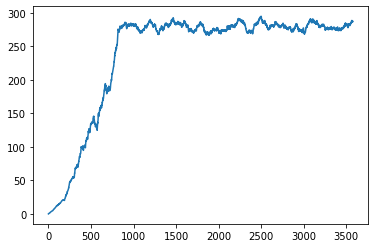

In [4]:
agent = agent_q_learning(env)
run(agent,5000, False, True)